# Natural Language Processing

In this homework assignment, you will tackle three distinct tasks involving text analysis:

1. Tweet Classification: Predict whether a specific tweet pertains to a natural disaster.
2. Bank Q&A Analysis: Deduce the user's query based on the text provided.
3. Fake News Classification: Determine whether a piece of news is true or false.

For educational reasons, we have retained all utility cells for data downloads. However, you can find everything you need in the corresponding GitHub repository subfolder.

# Solution Approach

Our solution approach will remain relatively consistent for all tasks:

1. Encode the text using a certain Language Model (LM), transforming each piece of text into a vector.
2. Implement a standard classification model (such as Logistic Regression, Random Forest, etc.) using these features.

Despite the varied nature of these tasks, you'll find that this approach provides a solid baseline solution for all three.

In [ ]:
# !pip install kaggle

In [ ]:
# !kaggle competitions download -c nlp-getting-started

In [ ]:
# !unzip nlp-getting-started.zip

# Task 1. Tweets

https://www.kaggle.com/competitions/nlp-getting-started


1. What is this dataset about?
2. Encode text with LM, what is the dimensionality of the resulting embeddings?
3. Plot TSNE describe the graph (run TSNE on 128 PCA components).
4. Run LR, use 5 fold cross-validation, which metrics are appropriate for this task?
5. Comment on model performance
6. Explore the results (use out-of-fold predictions), find 3 False Positive tweets, which do not really look like a disaster, e.g.:
- https://twitter.com/shauniefish/status/649148030290006017 `I just checked in! \x89ÛÒ at On Fire on @ZomatoAUS #LoveFood http://t.co/9l5kqykrbG`

## 1.1 What is this dataset about?

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/kurmukovai/ds-for-business/main/home-assignment-4/data/tweets/train.csv'
df = pd.read_csv(url, index_col=0)



In [ ]:
df.head(3)

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


## 1.2 Encode text with LM, what is the dimensionality of the resulting embeddings?

In [ ]:
!pip install langchain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 130.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=d47f3cd2bd450978d4f3ab3dc8cdcdcbcb7f904e361a178e2fe046fdfb6fc081
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings
from tqdm.notebook import tqdm

In [ ]:
embeddings = HuggingFaceEmbeddings()
tweets_embeddings = []

for _, tweet in tqdm(df.iterrows()):
    vec = embeddings.embed_query(tweet.text)
    tweets_embeddings.append(vec)

0it [00:00, ?it/s]

In [ ]:

# Get the dimensionality of the resulting embeddings
dim = []
for i in range(len(tweets_embeddings)):
  dim.append(len(tweets_embeddings[i]))
print("Dimensionality of the resulting embeddings:", set(dim))

Dimensionality of the resulting embeddings: {768}


## 1.3 Plot TSNE describe the graph (run TSNE on 128 PCA components).

In [ ]:
!pip install opentsne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 41.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
from openTSNE import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# TODO
embedding_array = np.array(tweets_embeddings)
pca = PCA(128)
X_pca = pca.fit_transform(tweets_embeddings)
tsne_embedding = TSNE().fit(X_pca)

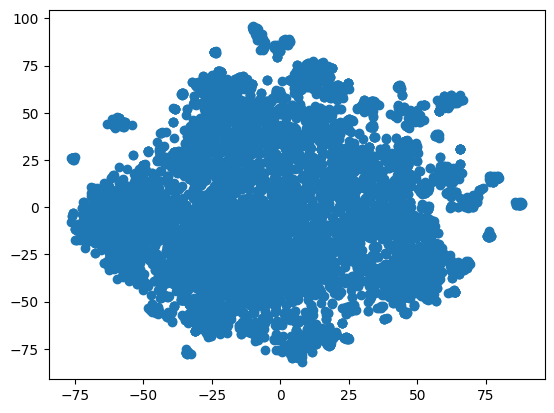

In [ ]:
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1]);

<ipython-input-13-1850792dc226>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


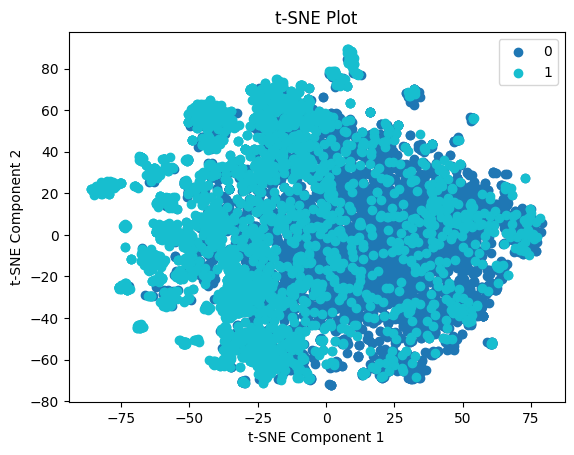

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Convert the list of embeddings and labels into numpy arrays
embedding_array = np.array(tweets_embeddings)
labels_array = np.array(df['target'].tolist())

# Perform PCA on the embedding array to reduce dimensionality to 128 components
pca = PCA(n_components=128)
pca_data = pca.fit_transform(embedding_array)

# Apply t-SNE on the reduced data to obtain 2D coordinates
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(pca_data)

# Get unique labels
unique_labels = np.unique(labels_array)

# Assign a color to each unique label
colors = plt.cm.get_cmap('tab10', len(unique_labels))

# Plot the resulting 2D coordinates with different colors based on labels
for i, label in enumerate(unique_labels):
    mask = labels_array == label
    plt.scatter(tsne_data[mask, 0], tsne_data[mask, 1], color=colors(i), label=label)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Plot')
plt.legend()
plt.show()


## 1.4 Run LR, use 5 fold cross-validation, which metrics are appropriate for this task?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score


In [ ]:

# Create a logistic regression model
logreg = LogisticRegression()

# Perform 5-fold cross-validation and calculate accuracy scores
scores = cross_val_score(logreg, embedding_array, labels_array, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the average accuracy score
average_score = scores.mean()
print("Average accuracy score:", average_score)

Accuracy scores for each fold: [0.8312541  0.78069599 0.79514117 0.80814717 0.84362681]
Average accuracy score: 0.8117730497677746


In [ ]:

# Create a logistic regression model
logreg = LogisticRegression()

# Perform cross-validation and obtain predicted labels for each sample
predicted_labels = cross_val_predict(logreg, embedding_array, labels_array, cv=5)

# Calculate the accuracy score using the predicted labels
accuracy = accuracy_score(labels_array, predicted_labels)

# Print the accuracy score
print("Accuracy score:", accuracy)


Accuracy score: 0.8117693419151452


## 1.5 Comment on model performance

## 1.6     Explore the results (use out-of-fold predictions), find 3 False Positive tweets, which do not really look like a disaster, e.g.:

    https://twitter.com/shauniefish/status/649148030290006017 I just checked in! \x89ÛÒ at On Fire on @ZomatoAUS #LoveFood http://t.co/9l5kqykrbG


In [ ]:
for i, (true, prediction) in enumerate(zip(labels_array, predicted_labels)):
    if true != prediction:
        print(true)
        print(prediction)
        print(df.iloc[i].text)
        print('======')

Streaming output truncated to the last 5000 lines.
1
0
@reriellechan HE WAS THE LICH KING'S FIRST CASUALTY BLOCK ME BACK I HATE YOU! http://t.co/0Gidg9U45J
1
0
#NowPlaying: Dubstep Hardstyle Trap Messy Mix (event recording) by Alien Casualty on @Mixify http://t.co/m203UL6o7p http://t.co/m203UL6o7p
0
1
.@stavernise: France agreed to repay Russia for two warships which were never delivered after economic sanctions  http://t.co/K4H8cq7puo
1
0
.@robdelaney  Catastrophe is anything but! I literally have been unable to stop ejaculating.
0
1
#Borrowers concerned at possible #interest rate rise. This could be a #catastrophe http://t.co/SBHHkkz01Y
1
0
#boy #mix Ultimate #preparedness library: http://t.co/O207JyaByz Prepare Yourself For Any Catastrophe. Over 10 http://t.co/cjCtb2oCxg
0
1
God bless catastrophe
1
0
UPDATE: 7 of the 9 Mac Pros my company bought in May have had catastrophe failures requiring repair!
0
1
Burford. What a catastrophe! Traffic and big lorries. No action as usual from Co

In [ ]:
# Find false positive tweets
false_positive_tweets = []
for i in range(len(labels_array)):
    if labels_array[i] == 0 and predicted_labels[i] == 1:
        false_positive_tweets.append(df.iloc[i]["text"])

# Print 3 false positive tweets
print("False Positive Tweets:")
for tweet in false_positive_tweets[:3]:
    print("- ", tweet)

False Positive Tweets:
-  On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N
-  #stlouis #caraccidentlawyer Speeding Among Top Causes of Teen Accidents https://t.co/k4zoMOF319 https://t.co/S2kXVM0cBA Car Accident teeÛ_
-  I still have not heard Church Leaders of Kenya coming forward to comment on the accident issue and disciplinary measures#ArrestPastorNganga


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import numpy as np

# Create a logistic regression model
logreg = LogisticRegression()

# Define the number of folds for cross-validation
num_folds = 5

# Initialize an array to store the out-of-fold predictions
out_of_fold_preds = np.zeros(len(labels_array))

# Perform cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for fold, (train_index, val_index) in enumerate(kf.split(embedding_array)):
    # Split the data into training and validation sets for the current fold
    X_train, X_val = embedding_array[train_index], embedding_array[val_index]
    y_train, y_val = labels_array[train_index], labels_array[val_index]

    # Fit the logistic regression model on the training data
    logreg.fit(X_train, y_train)

    # Predict the labels for the validation data
    val_preds = logreg.predict(X_val)

    # Store the predicted labels in the corresponding indices of the out-of-fold predictions array
    out_of_fold_preds[val_index] = val_preds

# Calculate the overall accuracy score using the out-of-fold predictions
accuracy = accuracy_score(labels_array, out_of_fold_preds)

# Print the accuracy score
print("Accuracy score using out-of-fold predictions:", accuracy)


Accuracy score using out-of-fold predictions: 0.8254301852095101


In [ ]:
# Find false positive tweets
false_positive_tweets = []
for i in range(len(labels_array)):
    if labels_array[i] == 0 and out_of_fold_preds[i] == 1:
        false_positive_tweets.append(df.iloc[i]["text"])

# Print 3 false positive tweets
print("False Positive Tweets:")
for tweet in false_positive_tweets[:3]:
    print("- ", tweet)

False Positive Tweets:
-  On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N
-  #stlouis #caraccidentlawyer Speeding Among Top Causes of Teen Accidents https://t.co/k4zoMOF319 https://t.co/S2kXVM0cBA Car Accident teeÛ_
-  I still have not heard Church Leaders of Kenya coming forward to comment on the accident issue and disciplinary measures#ArrestPastorNganga


Precision: 0.8033003300330033
Recall: 0.7441149495567105
F1-score: 0.7725757816219648
ROC AUC: 0.8034255079427957


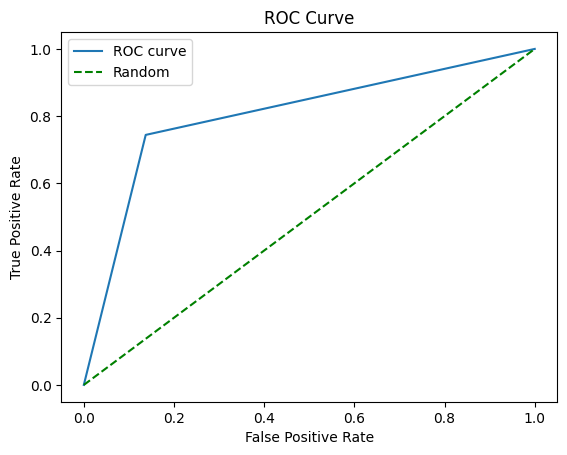

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



# Compute precision
precision = precision_score(labels_array, predicted_labels)

# Compute recall
recall = recall_score(labels_array, predicted_labels)

# Compute F1-score
f1 = f1_score(labels_array, predicted_labels)

# Compute ROC AUC score
roc_auc = roc_auc_score(labels_array, predicted_labels)

# Print the computed scores
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)


# Plot ROC curve
fpr, tpr, _ = roc_curve(labels_array, predicted_labels)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'g--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Task 2. Bank Customers' Q&A system

https://huggingface.co/datasets/PolyAI/banking77


1. What is this dataset about?
2. What is the minimal and maximal median text length for different classes (e.g. median text length for `atm_support` is 35).
3. Encode text with LM
4. Run RF, use 5 fold cross-validation, which metrics are appropriate for this task?
5. Comment on model performance
6. Analyze the errors of your model (use out-of-fold predictions), which two classes are mostly confused by your model?
7. (optional) plot a TSNE graph, with all observations, but color only two classes from the previous question. Make other points  color ligth gray, comment on the graph.

## 2.1 What is this dataset about?

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/PolyAI-LDN/task-specific-datasets/master/banking_data/train.csv')

In [ ]:
df.head(3)

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival


In [ ]:
df.category.value_counts()

card_payment_fee_charged                            187
direct_debit_payment_not_recognised                 182
balance_not_updated_after_cheque_or_cash_deposit    181
wrong_amount_of_cash_received                       180
cash_withdrawal_charge                              177
                                                   ... 
lost_or_stolen_card                                  82
card_swallowed                                       61
card_acceptance                                      59
virtual_card_not_working                             41
contactless_not_working                              35
Name: category, Length: 77, dtype: int64

## 2.2 What is the minimal and maximal median text length for different classes?
e.g. median text length for atm_support is 35.

In [ ]:
# Group the dataset by intent and calculate the median text length for each group
df['text_length'] = df['text'].apply(len)
median_lengths = df.groupby('category')['text_length'].median()

# Find the minimal and maximal median text length
min_median_length = median_lengths.min()
max_median_length = median_lengths.max()

print(f"Minimal median text length: {min_median_length}")
print(f"Maximal median text length: {max_median_length}")

Minimal median text length: 30.0
Maximal median text length: 66.0


In [ ]:
median_lengths.atm_support

35.0

## 2.3 Encode text with LM

In [ ]:
embeddings = HuggingFaceEmbeddings()
bank_embeddings = []

for _, bank in tqdm(df.iterrows()):
    vec = embeddings.embed_query(bank.text)
    bank_embeddings.append(vec)

0it [00:00, ?it/s]

In [ ]:

# Get the dimensionality of the resulting embeddings
dim = []
for i in range(len(bank_embeddings)):
  dim.append(len(bank_embeddings[i]))
print("Dimensionality of the resulting embeddings:", set(dim))

Dimensionality of the resulting embeddings: {768}


## 2.4 Run RF, use 5 fold cross-validation, which metrics are appropriate for this task?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Convert the list of embeddings and labels into numpy arrays
embedding_bank = np.array(bank_embeddings)
labels_bank = np.array(df['category'].tolist())

In [ ]:


# Create a random forest classifier with 10 estimators
clf = RandomForestClassifier(n_estimators=10)

# Perform 5-fold cross-validation and obtain the predicted labels for each fold
y_pred = cross_val_predict(clf, embedding_bank, labels_bank, cv=5)

# Calculate the accuracy score
accuracy = accuracy_score(labels_bank, y_pred)
print("Accuracy score:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(labels_bank, y_pred, average='weighted')
recall = recall_score(labels_bank, y_pred, average='weighted')
f1 = f1_score(labels_bank, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)




Accuracy score: 0.8033589923023093
Precision: 0.8094584784604342
Recall: 0.8033589923023093
F1-score: 0.8028941077929838


## 2.5 Comment on model performance

How many classes in this dataset?

In [ ]:
import pandas as pd

# Assuming you have your dataset stored in a variable called 'df' and the target column is 'target'

# Get the unique classes from the 'target' column
classes = df['category'].unique().tolist()

# Print the list of classes
print("List of classes:", classes)
print("Number of classes:", len(classes))


List of classes: ['card_arrival', 'card_linking', 'exchange_rate', 'card_payment_wrong_exchange_rate', 'extra_charge_on_statement', 'pending_cash_withdrawal', 'fiat_currency_support', 'card_delivery_estimate', 'automatic_top_up', 'card_not_working', 'exchange_via_app', 'lost_or_stolen_card', 'age_limit', 'pin_blocked', 'contactless_not_working', 'top_up_by_bank_transfer_charge', 'pending_top_up', 'cancel_transfer', 'top_up_limits', 'wrong_amount_of_cash_received', 'card_payment_fee_charged', 'transfer_not_received_by_recipient', 'supported_cards_and_currencies', 'getting_virtual_card', 'card_acceptance', 'top_up_reverted', 'balance_not_updated_after_cheque_or_cash_deposit', 'card_payment_not_recognised', 'edit_personal_details', 'why_verify_identity', 'unable_to_verify_identity', 'get_physical_card', 'visa_or_mastercard', 'topping_up_by_card', 'disposable_card_limits', 'compromised_card', 'atm_support', 'direct_debit_payment_not_recognised', 'passcode_forgotten', 'declined_cash_withdra

An accuracy score of 0.8033 suggests that approximately 80.33% of the samples were predicted correctly by the model and other additional metrics like precision, recall, and F1 score had the score of 80% suggesting a reasonably balanced performance.

## 2.6 Analyze the errors of your model (use out-of-fold predictions). Which two classes are confused by your model the most?

In [ ]:
errors = dict()

for i,(true,predicted) in enumerate(zip(labels_bank, y_pred)):
    if true!=predicted:
        key = '-'.join(sorted([true,predicted]))
        if key in errors:
            errors[key] += 1
        else:
            errors[key] = 1
        print(true)
        print(predicted)
        print(df.iloc[i].text)
        print('======')

Streaming output truncated to the last 5000 lines.
card_payment_not_recognised
card_payment_fee_charged
I don't recognize a charge on my statement.
card_payment_not_recognised
direct_debit_payment_not_recognised
Someone else accessed my account and made a payment.
card_payment_not_recognised
activate_my_card
I need help with some transactions in my account that I dont recognize or remember purchasing. Im not sure if the name is just different or what. Should my card be put on hold while the issue gets figured out to be safe or is it ok?
card_payment_not_recognised
Refund_not_showing_up
I think my card is being used by someone else to make purchases that I didn't authorize! I checked my account and see that there have been quite a few purchases over the last two days that I have no idea where they came from. We need to freeze my card now! And I need to find a way to get my money back.
card_payment_not_recognised
transaction_charged_twice
I have a charge I did not make.
card_payment_not_

In [ ]:
sorted(errors.items(), key=lambda x: x[1], reverse=True)

[('card_payment_wrong_exchange_rate-wrong_exchange_rate_for_cash_withdrawal',
  29),
 ('balance_not_updated_after_bank_transfer-transfer_not_received_by_recipient',
  29),
 ('balance_not_updated_after_bank_transfer-transfer_timing', 29),
 ('balance_not_updated_after_bank_transfer-pending_transfer', 28),
 ('card_payment_not_recognised-direct_debit_payment_not_recognised', 24),
 ('pending_top_up-top_up_failed', 23),
 ('beneficiary_not_allowed-failed_transfer', 23),
 ('card_payment_fee_charged-extra_charge_on_statement', 22),
 ('pending_transfer-transfer_not_received_by_recipient', 21),
 ('top_up_failed-top_up_reverted', 21),
 ('Refund_not_showing_up-request_refund', 20),
 ('exchange_via_app-fiat_currency_support', 17),
 ('pending_top_up-top_up_reverted', 17),
 ('card_arrival-card_delivery_estimate', 16),
 ('declined_cash_withdrawal-wrong_amount_of_cash_received', 16),
 ('unable_to_verify_identity-verify_my_identity', 16),
 ('declined_transfer-failed_transfer', 16),
 ('top_up_by_bank_tran

In [ ]:
#Using out-of-fold predictions
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert string labels to numerical values using label encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels_bank)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=10)

# Define the number of folds for cross-validation
num_folds = 5

# Initialize an array to store the out-of-fold predictions
out_of_fold_preds = np.zeros(len(encoded_labels))

# Perform cross-validation and obtain predicted labels for each fold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for fold, (train_index, val_index) in enumerate(kf.split(embedding_bank)):
    # Split the data into training and validation sets for the current fold
    X_train, X_val = embedding_bank[train_index], embedding_bank[val_index]
    y_train, y_val = encoded_labels[train_index], encoded_labels[val_index]

    # Fit the Random Forest classifier on the training data
    clf.fit(X_train, y_train)

    # Predict the labels for the validation data
    val_preds = clf.predict(X_val)

    # Store the predicted labels in the corresponding indices of the out-of-fold predictions array
    out_of_fold_preds[val_index] = val_preds




In [ ]:
# Convert numerical labels back to string labels
predicted_labels = label_encoder.inverse_transform(out_of_fold_preds.astype(int))

errors = dict()

for i,(true,predicted) in enumerate(zip(labels_bank, predicted_labels)):
    if true!=predicted:
        key = '-'.join(sorted([true,predicted]))
        if key in errors:
            errors[key] += 1
        else:
            errors[key] = 1
        print(true)
        print(predicted)
        print(df.iloc[i].text)
        print('======')

Streaming output truncated to the last 5000 lines.
balance_not_updated_after_cheque_or_cash_deposit
pending_card_payment
When will my cheque process?
balance_not_updated_after_cheque_or_cash_deposit
balance_not_updated_after_bank_transfer
Where is the money I put in the bank?
balance_not_updated_after_cheque_or_cash_deposit
Refund_not_showing_up
I did a cash deposit to my account, but I am not seeing it on my statement.
balance_not_updated_after_cheque_or_cash_deposit
balance_not_updated_after_bank_transfer
I have cash deposit to my account but it is experiencing a problem
balance_not_updated_after_cheque_or_cash_deposit
Refund_not_showing_up
The cast deposit from a week ago still is not in my account. Why?
balance_not_updated_after_cheque_or_cash_deposit
pending_cash_withdrawal
I am still awaiting the money I put into my account this morning.
balance_not_updated_after_cheque_or_cash_deposit
atm_support
where is my money from this morning
balance_not_updated_after_cheque_or_cash_deposi

In [ ]:
sorted(errors.items(), key=lambda x: x[1], reverse=True)

[('beneficiary_not_allowed-failed_transfer', 32),
 ('balance_not_updated_after_bank_transfer-transfer_not_received_by_recipient',
  30),
 ('top_up_failed-top_up_reverted', 26),
 ('balance_not_updated_after_bank_transfer-pending_transfer', 26),
 ('balance_not_updated_after_bank_transfer-transfer_timing', 24),
 ('card_payment_wrong_exchange_rate-wrong_exchange_rate_for_cash_withdrawal',
  22),
 ('card_payment_fee_charged-cash_withdrawal_charge', 22),
 ('pending_transfer-transfer_not_received_by_recipient', 22),
 ('card_arrival-card_delivery_estimate', 21),
 ('pending_top_up-top_up_failed', 21),
 ('fiat_currency_support-supported_cards_and_currencies', 19),
 ('card_payment_fee_charged-extra_charge_on_statement', 18),
 ('unable_to_verify_identity-why_verify_identity', 18),
 ('Refund_not_showing_up-request_refund', 18),
 ('card_payment_not_recognised-direct_debit_payment_not_recognised', 17),
 ('card_payment_fee_charged-transfer_fee_charged', 16),
 ('pending_top_up-top_up_reverted', 14),
 (

## 2.7 (optional) plot a TSNE graph, with all observations, but color only two classes from the previous question. Make other points color ligth gray, comment on the graph. Analyze model's errors.

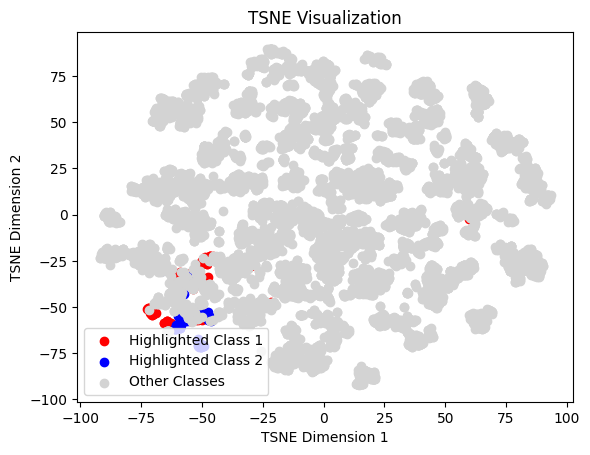

In [ ]:

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform TSNE on the embedding array
tsne = TSNE(n_components=2, random_state=42)
embedding_tsne = tsne.fit_transform(embedding_bank)

# Get the predicted labels for the highlighted classes
highlighted_class1 = 'balance_not_updated_after_bank_transfer'  # Replace with the first class you want to highlight
highlighted_class2 = 'transfer_timing' # Replace with the second class you want to highlight

# Plot the TSNE graph
plt.scatter(embedding_tsne[labels_bank == highlighted_class1, 0], embedding_tsne[labels_bank == highlighted_class1, 1], color='red', label='Highlighted Class 1')
plt.scatter(embedding_tsne[labels_bank == highlighted_class2, 0], embedding_tsne[labels_bank == highlighted_class2, 1], color='blue', label='Highlighted Class 2')
plt.scatter(embedding_tsne[(labels_bank != highlighted_class1) & (labels_bank != highlighted_class2), 0], embedding_tsne[(labels_bank != highlighted_class1) & (labels_bank != highlighted_class2), 1], color='lightgray', label='Other Classes')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.legend()
plt.title('TSNE Visualization')
plt.show()


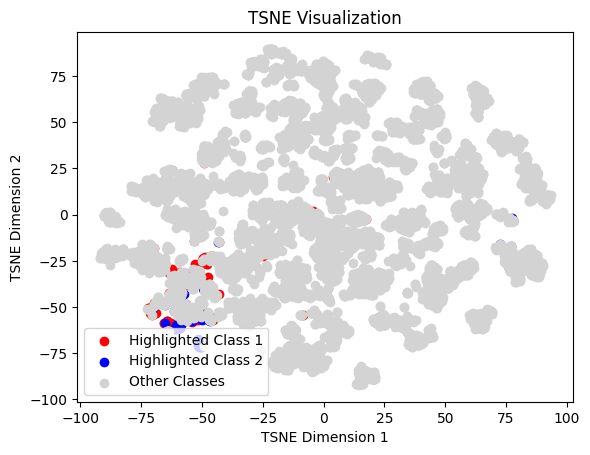

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform TSNE on the embedding array
tsne = TSNE(n_components=2, random_state=42)
embedding_tsne = tsne.fit_transform(embedding_bank)

# Get the predicted labels for the highlighted classes
highlighted_class1 = 'balance_not_updated_after_bank_transfer'
highlighted_class2 = 'transfer_timing'

# Plot the TSNE graph
plt.scatter(embedding_tsne[y_pred == highlighted_class1, 0], embedding_tsne[y_pred == highlighted_class1, 1], color='red', label='Highlighted Class 1')
plt.scatter(embedding_tsne[y_pred == highlighted_class2, 0], embedding_tsne[y_pred == highlighted_class2, 1], color='blue', label='Highlighted Class 2')
plt.scatter(embedding_tsne[(y_pred != highlighted_class1) & (y_pred != highlighted_class2), 0], embedding_tsne[(y_pred != highlighted_class1) & (y_pred != highlighted_class2), 1], color='lightgray', label='Other Classes')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.legend()
plt.title('TSNE Visualization')
plt.show()


In [ ]:
import plotly.graph_objects as go
from sklearn.manifold import TSNE

# Perform TSNE on the embedding array
tsne = TSNE(n_components=3, random_state=42)
embedding_tsne = tsne.fit_transform(embedding_bank)

# Get the predicted labels for the highlighted classes
highlighted_class1 = 'balance_not_updated_after_bank_transfer'
highlighted_class2 = 'transfer_timing'

# Create a trace for the highlighted class 1
trace_class1 = go.Scatter3d(
    x=embedding_tsne[y_pred == highlighted_class1, 0],
    y=embedding_tsne[y_pred == highlighted_class1, 1],
    z=embedding_tsne[y_pred == highlighted_class1, 2],
    mode='markers',
    marker=dict(color='red', size=4),
    name='Highlighted Class 1'
)

# Create a trace for the highlighted class 2
trace_class2 = go.Scatter3d(
    x=embedding_tsne[y_pred == highlighted_class2, 0],
    y=embedding_tsne[y_pred == highlighted_class2, 1],
    z=embedding_tsne[y_pred == highlighted_class2, 2],
    mode='markers',
    marker=dict(color='blue', size=4),
    name='Highlighted Class 2'
)

# Create a trace for the other classes
trace_other = go.Scatter3d(
    x=embedding_tsne[(y_pred != highlighted_class1) & (y_pred != highlighted_class2), 0],
    y=embedding_tsne[(y_pred != highlighted_class1) & (y_pred != highlighted_class2), 1],
    z=embedding_tsne[(y_pred != highlighted_class1) & (y_pred != highlighted_class2), 2],
    mode='markers',
    marker=dict(color='lightgray', size=4),
    name='Other Classes'
)

# Create the layout
layout = go.Layout(
    title='3D TSNE Visualization',
    scene=dict(
        xaxis=dict(title='TSNE Dimension 1'),
        yaxis=dict(title='TSNE Dimension 2'),
        zaxis=dict(title='TSNE Dimension 3')
    )
)

# Create the figure
fig = go.Figure(data=[trace_class1, trace_class2, trace_other], layout=layout)

# Show the figure
fig.show()


# Task 3. Fake news

https://www.kaggle.com/datasets/jainpooja/fake-news-detection

1. What is this dataset about?
2. How many unique subjects are in True news and Fake news?
3. Encode text with LM
4. Run LR, use 5 fold cross-validation, which metrics are appropriate for this task?
5. Comment on model performance, would you prefer a model with high Recall or with high Precision?
6. (optional) Analyze class distribution of the model. How many articles mentioning "Trump" are Fake? How many articles not mentioning "Trump" are Fake? Same question for "Obama". Can you say that this dataset is biased, explain?
7. (optional) using your model find False Positives which are actually True statements (news).


In [ ]:
# !kaggle datasets download -d jainpooja/fake-news-detection

In [ ]:
# !unzip fake-news-detection.zip

## 3.1 What is this dataset about?

In [ ]:
import pandas as pd

url1 = 'https://raw.githubusercontent.com/kurmukovai/ds-for-business/main/home-assignment-4/data/fake_news/Fake.csv'
df_fake = pd.read_csv(url1,index_col=0)

url2 = 'https://raw.githubusercontent.com/kurmukovai/ds-for-business/main/home-assignment-4/data/fake_news/True.csv'
df_true = pd.read_csv(url2, index_col=0)

df = pd.concat([df_fake, df_true])
df['target'] = [1] * df_fake.shape[0] + [0] * df_true.shape[0]  # 1 if Fake, 0 o/w


In [ ]:
df.head()

,text,subject,date,target
title,,,,
Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


## 3.2 How many unique subjects are in True news and Fake news?

In [ ]:
unique_subjects_fake = df.loc[df['target'] == 1, 'subject'].nunique()
unique_subjects_true = df.loc[df['target'] == 0, 'subject'].nunique()

print("Number of unique subjects in Fake news dataset:", unique_subjects_fake)
print("Number of unique subjects in True news dataset:", unique_subjects_true)

Number of unique subjects in Fake news dataset: 6
Number of unique subjects in True news dataset: 2


In [ ]:
!pip install sentence-transformers
!pip install langchain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=4777a3cdf664558a3d46c46bb1917afa99b3007abc7ebe9be0dac29c8fc38d66
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
Looking in indexes: https://pypi.org/simple, https://

## 3.3 Encode text with LM.

due to dataset size it will take ~15 mins on average PC

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings
from tqdm.notebook import tqdm
embeddings = HuggingFaceEmbeddings()
news_embeddings = []

for _, news in tqdm(df.iterrows()):
    vec = embeddings.embed_query(news.text)
    news_embeddings.append(vec)

0it [00:00, ?it/s]

In [ ]:
import numpy as np
news_embeddings = np.array(news_embeddings)
labels_news = np.array(df['target'].tolist())

## 3.4 Run LR, use 5 fold cross-validation, which metrics are appropriate for this task?

In [ ]:



from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
# Create a logistic regression model
logreg = LogisticRegression()

# Perform cross-validation and obtain predicted labels for each sample
predicted_labels = cross_val_predict(logreg, news_embeddings, labels_news, cv=5)

# Calculate the accuracy score using the predicted labels
accuracy = accuracy_score(labels_news, predicted_labels)

# Print the accuracy score
print("Accuracy score:", accuracy)

Accuracy score: 0.9535836785602922


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Perform 5-fold cross-validation and evaluate metrics
cv_scores_roc_auc = cross_val_score(logreg, news_embeddings, labels_news, cv=5, scoring='roc_auc')
cv_scores_accuracy = cross_val_score(logreg, news_embeddings, labels_news, cv=5, scoring='accuracy')

# Perform 5-fold cross-validation and calculate precision and recall
cv_predictions = cross_val_predict(logreg, news_embeddings, labels_news, cv=5)
cv_precision = precision_score(labels_news, cv_predictions)
cv_recall = recall_score(labels_news, cv_predictions)

# Print the cross-validation scores for ROC AUC, Accuracy, Precision, and Recall
print("Cross-validation scores (ROC AUC):", cv_scores_roc_auc)
print("Average cross-validation score (ROC AUC):", cv_scores_roc_auc.mean())
print("Cross-validation scores (Accuracy):", cv_scores_accuracy)
print("Average cross-validation score (Accuracy):", cv_scores_accuracy.mean())
print("Precision:", cv_precision)
print("Recall:", cv_recall)


Cross-validation scores (ROC AUC): [0.99448245 0.99322496 0.98476163 0.99524819 0.993591  ]
Average cross-validation score (ROC AUC): 0.9922616443945994
Cross-validation scores (Accuracy): [0.95935412 0.9513363  0.93775056 0.96269072 0.95678806]
Average cross-validation score (Accuracy): 0.9535839527568781
Precision: 0.957729003551106
Recall: 0.9533239640560454


## 3.5 Comment on model performance, would you prefer a model with high Recall or with high Precision?

## 3.6 (optional) Analyze class distribution of the model.

How many articles mentioning "Trump" are Fake? How many articles not mentioning "Trump" are Fake? Same question for "Obama". Can you say that this dataset is biased? Explain.

In [ ]:
df['is_trump'] = df['text'].apply(lambda x: 'Trump' in x)
df['is_obama'] = df['text'].apply(lambda x: 'Obama' in x)

In [ ]:

# Count articles mentioning "Trump" that are fake
fake_trump_articles = df[(df['is_trump'] == True) & (df['target'] == 1)]
fake_notrump_articles = df[(df['is_trump'] == False) & (df['target'] == 1)]

print("Fake Articles Mentioning 'Trump':", len(fake_trump_articles))
print("Fake Articles Not Mentioning 'Trump':", len(fake_notrump_articles))





Fake Articles Mentioning 'Trump': 12557
Fake Articles Not Mentioning 'Trump': 10924


In [ ]:
# Count articles mentioning "Obama" that are fake
fake_obama_articles = df[(df['is_obama'] == True) & (df['target'] == 1)]
fake_noobama_articles = df[(df['is_obama'] == False) & (df['target'] == 1)]

print("Fake Articles Mentioning 'Obama':", len(fake_obama_articles))
print("Fake Articles Not Mentioning 'Obama':", len(fake_noobama_articles))

Fake Articles Mentioning 'Obama': 6529
Fake Articles Not Mentioning 'Obama': 16952


In [ ]:
# Calculate the overall distribution of articles mentioning or not mentioning 'Trump' and 'Obama'
total_articles = len(df)

articles_mentioning_trump = df[df['is_trump'] == True]
articles_not_mentioning_trump = df[df['is_trump'] == False]

articles_mentioning_obama = df[df['is_obama'] == True]
articles_not_mentioning_obama = df[df['is_obama'] == False]

# Calculate the proportions of articles mentioning or not mentioning 'Trump' and 'Obama'
prop_mentioning_trump = len(articles_mentioning_trump) / total_articles
prop_not_mentioning_trump = len(articles_not_mentioning_trump) / total_articles

prop_mentioning_obama = len(articles_mentioning_obama) / total_articles
prop_not_mentioning_obama = len(articles_not_mentioning_obama) / total_articles

# Compare the counts with the overall distribution
print("Proportion of Articles Mentioning 'Trump':", prop_mentioning_trump)
print("Proportion of Articles Not Mentioning 'Trump':", prop_not_mentioning_trump)
print("Proportion of Articles Mentioning 'Obama':", prop_mentioning_obama)
print("Proportion of Articles Not Mentioning 'Obama':", prop_not_mentioning_obama)


Proportion of Articles Mentioning 'Trump': 0.4934295514276805
Proportion of Articles Not Mentioning 'Trump': 0.5065704485723195
Proportion of Articles Mentioning 'Obama': 0.23769432936879148
Proportion of Articles Not Mentioning 'Obama': 0.7623056706312085


## 3.7 (optional) using your model find False Positives (news which have target "Fake" but are actually True).

In [ ]:
# Find false positive tweets
false_positive_news = []
for i in range(len(labels_news)):
    if labels_news[i] == 0 and predicted_labels[i] == 1:
        false_positive_news.append(df.iloc[i]["text"])

# Print 3 false positive tweets
print("False Positive Tweets:")
new = []
for news in false_positive_news[:3]:
  new.append(news)
  print("- ", news)

False Positive Tweets:
-  The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Together, we are MAKING AMERICA GREAT AGAIN! bit.ly/2lnpKaq [1814 EST] - In the East, it could be the COLDEST New Year’s Eve on record. Perhaps we could use a little bit of that good old Global Warming that our Country, but not other countries, was going to pay TRILLIONS OF DOLLARS to protect against. Bundle up! [1901 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) 
-  The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Vanity Fair, which looks like it is on its last legs, is bending over backwards i

In [ ]:
for i in new:
  # Check if the text is present in the true news dataframe
  is_present = i in df_true['text'].values
  if is_present:
      print("The text is present in the true news dataframe.")
  else:
      print("The text is not present in the true news dataframe.")


The text is present in the true news dataframe.
The text is present in the true news dataframe.
The text is present in the true news dataframe.
